In [84]:
import numpy as py
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

In [85]:
df = pd.read_csv("jiji_car_dataset.csv")

df.head()

,title,make,model,year,condition,transmission,price
0,Lexus RX 350 2009 White,Lexus,RX 350,2009.0,foreign used,automatic,"₦ 12,850,000"
1,Hyundai Sonata Limited w/Brown Leather 4dr Sed...,Hyundai,Sonata Limited,2015.0,foreign used,automatic,"₦ 15,450,000"
2,Toyota Highlander Limited 2012 Gray,Toyota,Highlander Limited,2012.0,local used,automatic,"₦ 14,500,000"
3,Mercedes-Benz C300 Base AWD 4Matic Sedan (2.0L...,Mercedes-Benz,C300 Base,2015.0,local used,automatic,"₦ 13,800,000"
4,Hyundai Elantra 2014 Silver,Hyundai,Elantra,2014.0,foreign used,automatic,"₦ 12,000,000"


In [86]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1960 entries, 0 to 1959
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   title         1960 non-null   object 
 1   make          1955 non-null   object 
 2   model         1955 non-null   object 
 3   year          1955 non-null   float64
 4   condition     1960 non-null   object 
 5   transmission  1953 non-null   object 
 6   price         1960 non-null   object 
dtypes: float64(1), object(6)
memory usage: 107.3+ KB


In [87]:
# handling missing values
df.isnull().sum()

title           0
make            5
model           5
year            5
condition       0
transmission    7
price           0
dtype: int64

In [88]:
# checking rows with at least one missing value
df[df.isnull().any(axis=1)]

,title,make,model,year,condition,transmission,price
206,Toyota Corolla LE ECO w/Package 1 4dr Sedan (1...,Toyota,Corolla LE,2017.0,foreign used,NaN,"₦ 17,500,000"
706,Lexus IS 250 2008 Gray,Lexus,IS 250,2008.0,local used,NaN,"₦ 8,000,000"
764,Toyota Corolla S Plus 4dr Sedan (1.8L 4cyl CVT...,Toyota,Corolla S,2015.0,foreign used,NaN,"₦ 13,000,000"
900,Audi Q7 3.0T S line Prestige quattro 4dr SUV A...,NaN,NaN,NaN,foreign used,automatic,"₦ 18,000,000"
1198,Mercedes-Benz M Class ML400 4MATIC 4dr SUV AWD...,NaN,NaN,NaN,foreign used,automatic,"₦ 32,500,000"
1437,Toyota Highlander 2006 Blue,Toyota,Highlander,2006.0,local used,NaN,"₦ 6,200,000"
1565,Ford Edge 2007 Red,Ford,Edge,2007.0,local used,NaN,"₦ 4,800,000"
1633,Mercedes-Benz GL-Class GL450 4MATIC 4dr SUV AW...,NaN,NaN,NaN,foreign used,automatic,"₦ 41,000,000"
1705,Mercedes-Benz M Class ML400 4MATIC 4dr SUV AWD...,NaN,NaN,NaN,foreign used,automatic,"₦ 33,500,000"
1742,Toyota Highlander 2006 Blue,Toyota,Highlander,2006.0,local used,NaN,"₦ 6,200,000"


In [89]:
# dropping rows with missing values
df.dropna(inplace=True)
# df = df.drop(df[df["make"] == "New"].index)
df["make"].unique()

array(['Lexus', 'Hyundai', 'Toyota', 'Mercedes-Benz', 'Honda', 'Kia',
       'Chevrolet', 'Acura', 'Land', 'Ford', 'BMW', 'Skoda', 'Pontiac',
       'Chrysler', 'Dodge', 'Nissan', 'Peugeot', 'Audi', 'Volkswagen',
       'New', 'Daihatsu', 'Mini', 'GMC', 'Porsche', 'Mitsubishi', 'Mazda',
       'Opel', 'Volvo', 'Rolls-Royce', 'Isuzu', 'Rover', 'Lamborghini',
       'Cadillac', 'Jeep', 'Bentley', 'Geely', 'Infiniti'], dtype=object)

In [90]:
# Clean the price column
def clean_currency(x):
    if  isinstance(x, str):
        return float(
            x.replace("₦", "")
            .replace(",", "")
            .strip()
        )
    return x
    
df["price"] = df["price"].apply(clean_currency)
df.head()

,title,make,model,year,condition,transmission,price
0,Lexus RX 350 2009 White,Lexus,RX 350,2009.0,foreign used,automatic,12850000.0
1,Hyundai Sonata Limited w/Brown Leather 4dr Sed...,Hyundai,Sonata Limited,2015.0,foreign used,automatic,15450000.0
2,Toyota Highlander Limited 2012 Gray,Toyota,Highlander Limited,2012.0,local used,automatic,14500000.0
3,Mercedes-Benz C300 Base AWD 4Matic Sedan (2.0L...,Mercedes-Benz,C300 Base,2015.0,local used,automatic,13800000.0
4,Hyundai Elantra 2014 Silver,Hyundai,Elantra,2014.0,foreign used,automatic,12000000.0


In [91]:
# check for outliers
num_cols = df[["price"]]
q1 = num_cols.quantile(0.25)
q3 = num_cols.quantile(0.75)

iqr = q3 - q1

lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

outliers = ((num_cols < lower_bound) | (num_cols > upper_bound))
outliers.sum()

df = df.drop(df[df["price"] > 50000000].index)

In [92]:
# Standardise categorical columns
df["condition"] = df["condition"].astype(str).str.capitalize()
df["transmission"] = df["transmission"].astype(str).str.capitalize()

df["make"].replace({
    "Land": "Land Rover"
}, inplace=True)

df.head(20)

C:\Users\USER\AppData\Local\Temp\ipykernel_6056\910574839.py:5: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.





,title,make,model,year,condition,transmission,price
0,Lexus RX 350 2009 White,Lexus,RX 350,2009.0,Foreign used,Automatic,12850000.0
1,Hyundai Sonata Limited w/Brown Leather 4dr Sed...,Hyundai,Sonata Limited,2015.0,Foreign used,Automatic,15450000.0
2,Toyota Highlander Limited 2012 Gray,Toyota,Highlander Limited,2012.0,Local used,Automatic,14500000.0
3,Mercedes-Benz C300 Base AWD 4Matic Sedan (2.0L...,Mercedes-Benz,C300 Base,2015.0,Local used,Automatic,13800000.0
4,Hyundai Elantra 2014 Silver,Hyundai,Elantra,2014.0,Foreign used,Automatic,12000000.0
5,Hyundai Sonata 2015 Blue,Hyundai,Sonata,2015.0,Foreign used,Automatic,13500000.0
6,Lexus IS 2010 Black,Lexus,IS,2010.0,Local used,Automatic,15000000.0
7,Lexus RX 350 2012 White,Lexus,RX 350,2012.0,Foreign used,Automatic,19000000.0
8,Honda Civic Sedan EX 2013 Brown,Honda,Civic Sedan,2013.0,Foreign used,Automatic,13500000.0
9,Toyota Camry 2009 Green,Toyota,Camry,2009.0,Local used,Automatic,6000000.0


In [93]:
# Convert year to integer
df["year"] = df["year"].astype(int)
df.head()

,title,make,model,year,condition,transmission,price
0,Lexus RX 350 2009 White,Lexus,RX 350,2009,Foreign used,Automatic,12850000.0
1,Hyundai Sonata Limited w/Brown Leather 4dr Sed...,Hyundai,Sonata Limited,2015,Foreign used,Automatic,15450000.0
2,Toyota Highlander Limited 2012 Gray,Toyota,Highlander Limited,2012,Local used,Automatic,14500000.0
3,Mercedes-Benz C300 Base AWD 4Matic Sedan (2.0L...,Mercedes-Benz,C300 Base,2015,Local used,Automatic,13800000.0
4,Hyundai Elantra 2014 Silver,Hyundai,Elantra,2014,Foreign used,Automatic,12000000.0


In [94]:
# remove invalid year

greater = df[df["year"] > 2025].index
less = df[df["year"] < 1980].index
less
# no year less than 1980  and greater than 2025

Index([], dtype='int64')

In [95]:
# Exploratory Data Analysis (EDA)

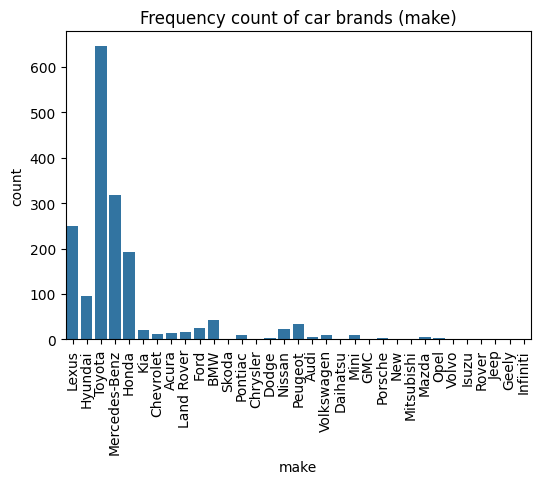

make
Toyota           646
Mercedes-Benz    318
Lexus            250
Honda            192
Hyundai           96
BMW               43
Peugeot           34
Ford              26
Nissan            23
Kia               20
Name: title, dtype: int64

In [96]:
# most common car brands (make)
most_car_brands = df.groupby("make")["title"].count().sort_values(ascending=False)


plt.figure(figsize=(6,4))
sns.countplot(data=df, x="make")
plt.title("Frequency count of car brands (make)")
plt.xticks(rotation=90)
plt.show()

most_car_brands.head(10)

In [97]:
# most common models per make
model_counts = df.groupby("make")["model"].value_counts()
most_common_models = model_counts.groupby("make").head(1)
# print(most_common_models)
most_model_by_make = most_common_models.reset_index(name="count")
most_model_by_make

,make,model,count
0,Acura,MDX,7
1,Audi,SQ5 3,2
2,BMW,3 Series,9
3,Chevrolet,Malibu,3
4,Chrysler,300C,1
5,Daihatsu,Terios 1,1
6,Dodge,Charger,3
7,Ford,Focus,5
8,GMC,Terrain,1
9,Geely,Coolray 1,2


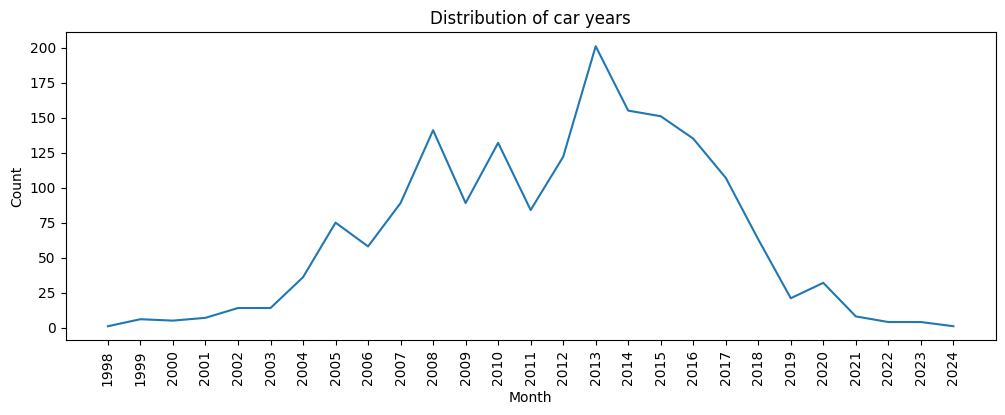

year
1998      1
1999      6
2000      5
2001      7
2002     14
2003     14
2004     36
2005     75
2006     58
2007     89
2008    141
2009     89
2010    132
2011     84
2012    122
2013    201
2014    155
2015    151
2016    135
2017    107
2018     63
2019     21
2020     32
2021      8
2022      4
2023      4
2024      1
Name: title, dtype: int64

In [98]:
# distribution of car years
car_years = df.groupby("year")["title"].count()

plt.figure(figsize=(12, 4))
plt.plot(car_years.index.astype(str), car_years.values)
plt.title("Distribution of car years")
plt.xlabel("Month")
plt.ylabel("Count")
plt.xticks(rotation=90)
plt.show()

car_years

In [99]:
# average price by brand and model
# by make
price_make = df.groupby("make")["price"].agg(['mean', 'median'])
price_make = price_make.sort_values(by="mean", ascending=False)
price_make


,mean,median
make,,
New,4.500000e+07,45000000.0
Dodge,2.895000e+07,30400000.0
Land Rover,2.623529e+07,26000000.0
Rover,2.500000e+07,25000000.0
Jeep,2.350000e+07,23500000.0
Mercedes-Benz,2.336091e+07,22000000.0
Geely,2.250000e+07,22500000.0
Audi,2.222000e+07,26000000.0
Volvo,2.097500e+07,20975000.0


In [100]:
# by model
price_model = df.groupby("model")["price"].agg(['count', 'median'])
price_model = price_model.sort_values(by="count", ascending=False)
price_model

,count,median
model,,
ES 350,75,15000000.0
RX 350,69,22500000.0
Camry,68,9395000.0
Accord,68,7500000.0
Camry LE,58,8250000.0
...,...,...
Toyota Corolla,1,45000000.0
Terios 1,1,5500000.0
XC90 T6,1,39000000.0


              count          mean           std         min         25%  \
condition                                                                 
Foreign used  981.0  2.141371e+07  1.042135e+07   3750000.0  13800000.0   
Local used    773.0  1.044776e+07  8.091084e+06   1700000.0   5500000.0   
New             1.0  4.500000e+07           NaN  45000000.0  45000000.0   

                     50%         75%         max  
condition                                         
Foreign used  18700000.0  26850000.0  50000000.0  
Local used     7980000.0  12300000.0  45500000.0  
New           45000000.0  45000000.0  45000000.0  


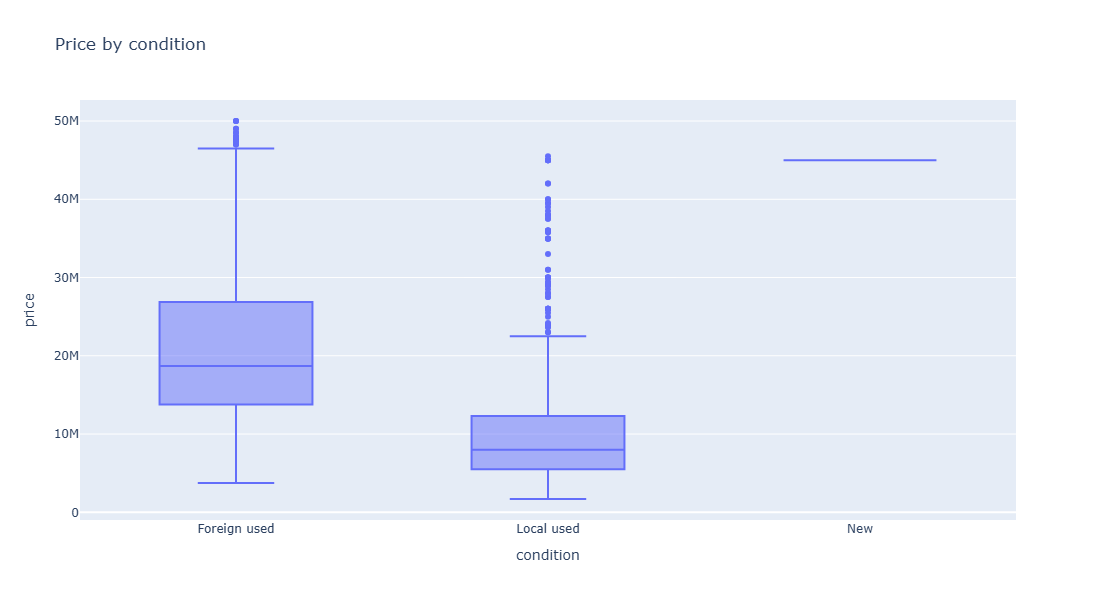

In [101]:
# How car condition affect price
print(df.groupby("condition")["price"].describe())

fig = px.box(
    df,
    x="condition",
    y="price",
    title="Price by condition"
    # points="all"
)
fig.update_layout(width=600, height=600)
fig.show()

# plt.figure(figsize=(6,4))
# sns.boxplot(data=df, x="condition", y="price")
# plt.title("Price by condition")
# plt.show()

In [102]:
# how transmission type affect price
print(df.groupby("transmission")["price"].describe())

# the average price shows that automatic car are generally pricier

               count          mean           std        min        25%  \
transmission                                                             
Automatic     1710.0  1.687036e+07  1.091194e+07  1800000.0  8500000.0   
Manual          45.0  6.214444e+06  5.431470e+06  1700000.0  3600000.0   

                     50%         75%         max  
transmission                                      
Automatic     14000000.0  22500000.0  50000000.0  
Manual         4500000.0   6500000.0  26000000.0  


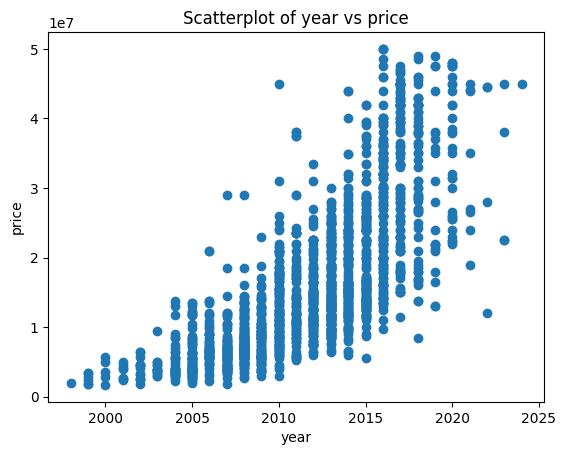

In [103]:
# Are newer cars significantly more expensive
plt.scatter(df['year'], df['price'])
plt.xlabel("year")
plt.ylabel("price")
plt.title("Scatterplot of year vs price")
plt.show()

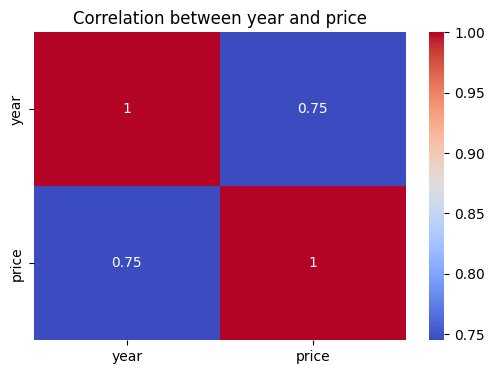

In [104]:
# Correlation coefficient between year and price
corr = df[["year", "price"]].corr()
plt.figure(figsize=(6,4))
sns.heatmap(data=corr, annot=True, cmap="coolwarm")
plt.title("Correlation between year and price")
plt.show()

In [105]:
df.head(10)

,title,make,model,year,condition,transmission,price
0,Lexus RX 350 2009 White,Lexus,RX 350,2009,Foreign used,Automatic,12850000.0
1,Hyundai Sonata Limited w/Brown Leather 4dr Sed...,Hyundai,Sonata Limited,2015,Foreign used,Automatic,15450000.0
2,Toyota Highlander Limited 2012 Gray,Toyota,Highlander Limited,2012,Local used,Automatic,14500000.0
3,Mercedes-Benz C300 Base AWD 4Matic Sedan (2.0L...,Mercedes-Benz,C300 Base,2015,Local used,Automatic,13800000.0
4,Hyundai Elantra 2014 Silver,Hyundai,Elantra,2014,Foreign used,Automatic,12000000.0
5,Hyundai Sonata 2015 Blue,Hyundai,Sonata,2015,Foreign used,Automatic,13500000.0
6,Lexus IS 2010 Black,Lexus,IS,2010,Local used,Automatic,15000000.0
7,Lexus RX 350 2012 White,Lexus,RX 350,2012,Foreign used,Automatic,19000000.0
8,Honda Civic Sedan EX 2013 Brown,Honda,Civic Sedan,2013,Foreign used,Automatic,13500000.0
9,Toyota Camry 2009 Green,Toyota,Camry,2009,Local used,Automatic,6000000.0


In [106]:
df.to_csv("cleaned_jiji_car_dataset.csv", index=False)

# Summary of Findings
The analysis shows that Lexus and Mercedes-Benz clearly dominate the premium segment of the Nigerian used-car market, while Toyota stands out for combining affordability with a presence in higher-value categories. Vehicle condition strongly influences pricing, with Foreign Used cars consistently commanding higher prices than locally used ones. Car prices decline noticeably as vehicles age, confirming that year is one of the strongest predictors of value. Automatic transmissions dominate both in listing volume and price, reflecting strong market preference. Overall, utility vehicles and luxury SUVs retain their value better over time compared to standard sedan models.


# Business Insights & Recommendations
The analysis indicates that the Lexus RX 350 and Toyota Hilux perform best overall, as they combine strong demand with high price retention across multiple model years. Foreign used vehicles contribute the highest revenue, as they consistently attract higher average prices compared to locally used cars. The highest volume of car listings is concentrated in recent model years, particularly those from 2015 and later, reflecting buyer preference for newer cars. To improve underperforming channels, dealers of locally used cars should focus on better vehicle refurbishment and competitive pricing. Expanding financing options and warranty coverage can also help boost buyer confidence in lower-performing segments. Finally, targeted marketing and inventory optimisation in regions with lower sales activity can help balance demand and improve overall market performance.